In [540]:
import pandas as pd
from datetime import datetime

In [541]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [542]:
dataset = pd.read_csv('last_one.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)

In [543]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)


In [544]:
dataset.index.name = 'date'

In [545]:
dataset.head()

,ville,Total incidents,Temp,Dew_point,Humidity,weekday,caserne,division,latitude,longitude,nombre_unites,area(km2),density,income-avg(2015),income-median(2015),population,#int
date,,,,,,,,,,,,,,,,,
2008-01-01 00:00:00,Ahuntsic / Cartierville,11,-4.7,-6.3,89.0,1,42.5,21.0,45.556506,-73.685032,2.0,24.16,5556.498344,70105.0,51169.0,122475.1932,2
2008-01-01 01:00:00,Ahuntsic / Cartierville,3,-4.2,-6.3,85.0,1,0.0,0.0,45.581554,-73.651107,0.0,24.16,5556.498344,70105.0,51169.0,122475.1932,0
2008-01-01 02:00:00,Ahuntsic / Cartierville,4,-2.8,-6.2,77.0,1,42.0,21.0,45.524449,-73.737146,1.0,24.16,5556.498344,70105.0,51169.0,122475.1932,1
2008-01-01 03:00:00,Ahuntsic / Cartierville,12,-2.1,-5.7,76.0,1,38.5,21.0,45.548322,-73.677277,3.0,24.16,5556.498344,70105.0,51169.0,122475.1932,2
2008-01-01 04:00:00,Ahuntsic / Cartierville,11,-2.2,-5.5,78.0,1,43.0,21.0,45.570641,-73.656907,1.0,24.16,5556.498344,70105.0,51169.0,122475.1932,1


In [546]:
dataset = dataset[dataset['ville']=="Westmount"]
dataset.drop('ville', axis=1, inplace=True)

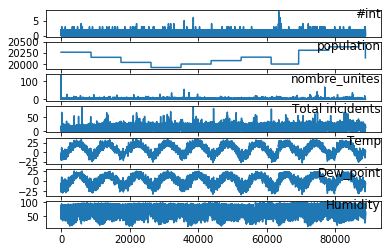

In [547]:
from matplotlib import pyplot
%matplotlib inline
# load dataset
values = dataset.values
# specify columns to plot
groups = [15, 14, 9, 0, 1, 2, 3]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [548]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [549]:
from sklearn import preprocessing as pp

# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = pp.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

#drop columns we don't want to predict
reframed.drop(reframed[['var1(t)', 'var2(t)', 'var3(t)', 'var4(t)',
       'var5(t)', 'var6(t)', 'var7(t)', 'var8(t)', 'var9(t)', 'var10(t)',
       'var11(t)', 'var12(t)', 'var13(t)', 'var14(t)', 'var15(t)']], axis=1, inplace=True)
print(reframed.head())



   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.117647   0.369010   0.461938   0.875000   0.166667        1.0   
2   0.023529   0.376997   0.461938   0.829545   0.166667        0.0   
3   0.035294   0.399361   0.463668   0.738636   0.166667        1.0   
4   0.129412   0.410543   0.472318   0.727273   0.166667        0.0   
5   0.117647   0.408946   0.475779   0.750000   0.166667        0.0   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.944444   0.399170   0.654419    0.007407         0.0         0.0   
2   0.000000   0.399170   0.654419    0.000000         0.0         0.0   
3   0.944444   0.597656   0.668579    0.007407         0.0         0.0   
4   0.000000   0.597656   0.668579    0.000000         0.0         0.0   
5   0.000000   0.597656   0.668579    0.000000         0.0         0.0   

   var13(t-1)  var14(t-1)  var15(t-1)  var16(t-1)  var16(t)  
1         0.0         0.0    0.633823       0.125     0.000  
2   

In [550]:
# split into train and test sets

values = reframed.values


#train data on first 6 year
#cross validate on next 2 year
#test on following ~2 years

n_train_hours = 365 * 24 * 6
n_cv_hours = 365 *24 *8

#split train, cv(cross_validation), test
train = values[:n_train_hours, :]
cv = values[n_train_hours:n_cv_hours, :]
test = values[n_cv_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
cv_X, cv_y = cv[:, :-1], cv[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
cv_X = cv_X.reshape((cv_X.shape[0], 1, cv_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, cv_X.shape, cv_y.shape, test_X.shape, test_y.shape)

(52560, 1, 16) (52560,) (17520, 1, 16) (17520,) (18717, 1, 16) (18717,)


In [557]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Embedding
from keras.layers import LSTM
from keras.optimizers import adam
from keras.callbacks import EarlyStopping
from keras import metrics
from keras import losses

callback = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=2, mode='auto', baseline=None, restore_best_weights=False)
#callbacks = [callback],

Train on 52560 samples, validate on 17520 samples
Epoch 1/50
52560/52560 [==============================] - 8s 159us/step - loss: 0.0314 - sparse_categorical_accuracy: 0.8685 - val_loss: 7.7446e-04 - val_sparse_categorical_accuracy: 0.8671
Epoch 2/50
52560/52560 [==============================] - 4s 78us/step - loss: 7.0293e-04 - sparse_categorical_accuracy: 0.8692 - val_loss: 7.7239e-04 - val_sparse_categorical_accuracy: 0.8671
Epoch 3/50
52560/52560 [==============================] - 5s 96us/step - loss: 5.4063e-05 - sparse_categorical_accuracy: 0.8692 - val_loss: 7.7565e-04 - val_sparse_categorical_accuracy: 0.8671
Epoch 4/50
52560/52560 [==============================] - 5s 96us/step - loss: 1.2264e-06 - sparse_categorical_accuracy: 0.8692 - val_loss: 7.7669e-04 - val_sparse_categorical_accuracy: 0.8671
Epoch 5/50
52560/52560 [==============================] - 5s 98us/step - loss: 1.1938e-06 - sparse_categorical_accuracy: 0.8692 - val_loss: 7.7802e-04 - val_sparse_categorical_accur

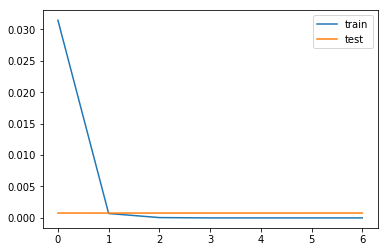

In [569]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
#model.add(Flatten())
model.add(Dense(2, activation='relu'))
model.compile(loss=losses.sparse_categorical_crossentropy, optimizer='adam', metrics = [metrics.sparse_categorical_accuracy])
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(cv_X, cv_y), callbacks =[callback],  verbose=1, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [578]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

yhat = model.predict(test_X)

test_X_re = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
test_yhat = yhat[:,0].reshape((len(yhat[:,0]), 1))
inv_yhat = concatenate((test_yhat, test_X_re[:, :-1]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X_re[:, :-1]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 9.596
